# chapter 14. 파일 다루기

## 1) 파일 경로

① pathlib 패키지의 Path 함수를 불러와 현재 홈 디렉토리 정보를 확인해 보시오.

In [1]:
from pathlib import Path

print(Path.home())

C:\Users\User


## 2) 새 파일 만들기

① open 함수로 파일오브젝트 f에 새 파일 이름과 옵션 'w'를 지정하여 홈 디렉토리에 새 파일을 만들어 봅시다.
* 파일 이름: "newfile2.txt"

In [2]:
f = open('newfile2.txt', 'w')

## 3) 파일 쓰기

① 파일오브젝트.write()로 앞서 만든 파일에 '파일 쓰기 연습입니다.'라고 써 보시오.

In [3]:
f.write('파일 쓰기 연습입니다.')

12

② 파일오브젝트.close()로 파일을 종료하고 파일에 작성한 내용이 잘 기록되었는지 확인해 보시오.

In [4]:
f.close()

③ 파일을 'w'로 오픈하고 내용("파일에 글씨를 써 봅시다")을 다시 작성하여 기존 내용을 덮어 씌워 보시오.

In [5]:
f = open('newfile2.txt', 'a')
f.write("새로운 내용입니다.")
f.close()

④ 파일을 'a' 옵션을 사용하여 오픈하고 기존 내용에 새로운 내용을 추가해 보시오.

⑤ 줄 바꿈 기호를 사용하여 기존 내용에 새로운 내용이 한 줄 내려가서 써 지도록 추가해 보시오.

In [6]:
f = open('newfile2.txt', 'a')
f.write("\n새로운 내용입니다.")
f.close()

⑥ [심화] 지금까지 배운 내용을 활용하여 다음과 같은 내용을 작성한 파일을 만들어 보시오.
* 먼저 제목으로 파일을 생성하고,
* 파일오브젝트.write()를 사용하여 첫 줄을 작성하시오.
* 파일오브젝트.close()로 종료하고
* 파일을 다시 열어 나머지 내용들을 한 줄씩 추가하시오.

        제목 : Little Star.txt
        내용 :
        Twinkle, twinkle little star
        How I wonder what you are
        Up above the world so high
        Like a diamond in the sky
        Twinkle, twinkle little star
        How I wonder what you are

In [10]:
f = open('Little Star.txt','w')
f.close()
f = open('Little Star.txt','a')
f.write(" 제목 : Little Star.txt \n")
f.write("내용 :\n")
f.close()

## 4) 파일 읽기

① poem.txt 파일을 .readline()을 사용하여 한 줄, 한 줄 읽어오시오.

In [12]:
f = open('poem.txt', 'r')
f.readline()
f.readline()
f.readline()
f.readline()
f.readline()
f.readline()
f.readline()
f.close()

② poem.txt 파일을 .readlines()를 사용하여 전체를 리스트로 읽어오시오.

In [14]:
f = open('poem.txt', 'r')
poem = f.readlines()
print(poem)
f.close()

['서시\n', '윤동주\n', '\n', '죽는 날까지 하늘을 우러러\n', '한 점 부끄럼이 없기를,\n', '잎새에 이는 바람에도\n', '나는 괴로워했다.\n', '\n', '별을 노래하는 마음으로\n', '모든 죽어 가는 것을 사랑해야지\n', '그리고 나한테 주어진 길을\n', '걸어가야겠다.\n', '\n', '오늘 밤에도 별이 바람에 스치운다.\n']


③ poem.txt 파일을 .realines()와 for loop를 사용하여 한 줄 씩 읽어오시오.

In [15]:
f = open('poem.txt', 'r')
poem = f.readlines()
f.close()

for i in poem:
    print(i)

서시

윤동주



죽는 날까지 하늘을 우러러

한 점 부끄럼이 없기를,

잎새에 이는 바람에도

나는 괴로워했다.



별을 노래하는 마음으로

모든 죽어 가는 것을 사랑해야지

그리고 나한테 주어진 길을

걸어가야겠다.



오늘 밤에도 별이 바람에 스치운다.



## 5) 워드 클라우드

① 인터넷에서 좋은 글(영문으로 된 연설문, 혹은 기사, 책 내용)을 찾아, txt로 저장하고 워드 클라우드를 만들어 봅시다.

* 코드는 예제파일을 참조하세요.
* 불필요한 단어/조사는 제거하세요.
* 글의 내용을 한눈에 파악할 수 있는 멋진 워드클라우드를 만들어 봅시다.

In [23]:
f = open('Stanford Comment.txt', 'r', encoding ="UTF8")
comment = f.read()
f.close()

# 텍스트 파일을 리스트 형태로 변경
word_list = comment.split()

In [37]:
# 중복 단어 제거
word_uniq = set(word_list)

# 딕셔너리 설정 key : 단어, value : 등장 횟수
word_count = {}

# 단어 등장 횟수 저장
for w in word_uniq:
    word_count[w] = word_list.count(w)

# 조사 제거
del_word = ['the', 'a', 'is', 'of', 'on', 'that', 'this', 'and', 'be', 'was',
           'will','in','to', 'from', 'I', 'as', 'for', 'our','with','you',
           'And', 'my', 'me', 'it', 'had','at', 'It', 'have',
           'so','but','about','The']
for w in del_word:
    if w in word_count:
        del word_count[w]

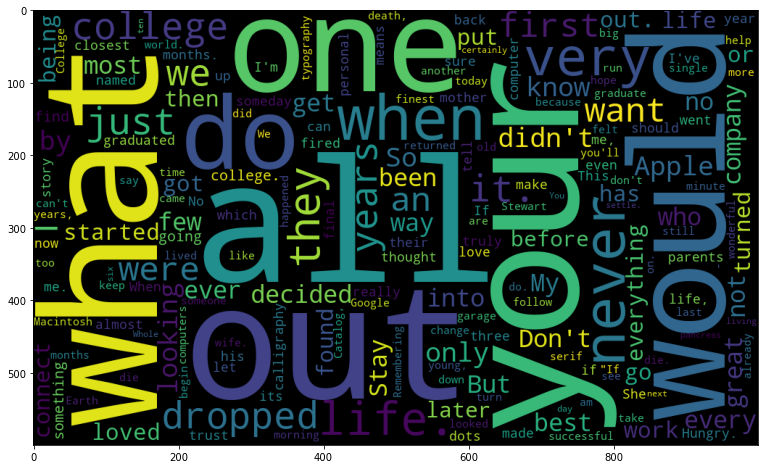

In [38]:
# ②워드클라우드
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# word cloud 그리기
wordcloud = WordCloud(width = 1000, height = 600).generate_from_frequencies(word_count)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.show()